# IBM Applied Data Science Capstone Project
This notebook will be mainly used for the Capstone Project

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Introduction: Business Undertanding

The Open Data Program makes the data generated by the City of Seattle has been openly available to the public for the purpose of increasing the quality of life for the residents, increasing transparency, accountability and comparability, promoting economic development and research, and improving internal performance management.

The Traffic Records Group, Traffic Management Division, Seattle Department of Transportation, provides data for all collisions and crashes that have occured in the state from 2004 to the present day. The data is updated weekly and can be found at the Seattle Open GeoData Portal.

The objective is to exploit this data to extract vital features that would enable us to end up with a good model that would enable the prediction of the severity of future accidents that take place in the state. This would further enable the Department of Transportation to prioritise their SOPs and channel their energy to ensure that fewer fatalities result in automobile collisions.

### Libraries Which are Used to Develope the Project:

Pandas: For creating and manipulating dataframes.

Folium: Python visualization library would be used to visualize the neighborhoods cluster distribution of using interactive leaflet map.

Scikit Learn: For importing k-means clustering.

JSON: Library to handle JSON files.

XML: To separate data from presentation and XML stores data in plain text format.

Geocoder: To retrieve Location Data.

Beautiful Soup and Requests: To scrap and library to handle http requests.

Matplotlib: Python Plotting Module.

## Data Description

The dataset is available as comma-separated values (CSV) files, KML files, and ESRI shapefiles that can be downloaded from the Seattle Open GeoData Portal. The data is also available from RESTful API services in formats such as GeoJSON.

In this phase we are going to understand the feature (attributes/column) that we will use to train our model
we will choose our data attributes based on:

- patterns
- correlations
- skewed information

#### Loading DataSet

In [4]:
data = pd.read_csv("Data-Collisions.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

#### Fetching list of attributes we have in our DataSet

In [6]:
data.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

#### Checking data Corellation.

In [77]:
data.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.120754,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.114935,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,0.046929,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.969276,0.028076,0.056046
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,0.048524,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,0.048499,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
INTKEY,0.006553,0.120754,-0.114935,0.046929,0.048524,0.048499,1.000000,0.006553,0.001886,-0.004784,0.000531,-0.012929,0.007114,0.032604,-0.010510,0.018420
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.006553,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.001886,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,-0.004784,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326


#### Visual Representation of the Correlation Matrix.

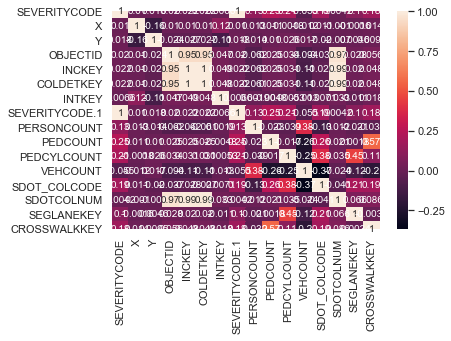

<Figure size 2808x1440 with 0 Axes>

In [78]:
sns.heatmap(data.corr(), annot=True)
plt.figure(figsize=(39,20))
plt.show()

#### Data visualization on VEHCOUNT Vs SEVERITYCODE.

Text(0, 0.5, 'Severity code')

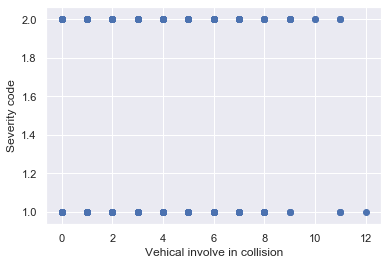

In [80]:
plt.scatter(y=data['SEVERITYCODE'], x=data['VEHCOUNT'])
plt.xlabel("Vehical involve in collision")
plt.ylabel("Severity code")

##### The WEATHER field contains a description of the weather conditions during the time of the Collision.

In [9]:
data['WEATHER'].value_counts().to_frame('count')

,count
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


#### The ROADCOND field describes the condition of the road during the Collision.

In [10]:
data['ROADCOND'].value_counts().to_frame('count')

,count
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


#### The LIGHTCOND field describes the light conditions during the Collision.

In [12]:
data['LIGHTCOND'].value_counts().to_frame('count')

,count
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


#### The SPEEDING field classifies Collisions based on whether or not speeding was a factor in the collision. Blanks indicate cases where the vehicle was not speeding.

In [13]:
data['SPEEDING'].value_counts().to_frame()

,SPEEDING
Y,9333



The SEVERITYCODE field contains a code that corresponds to the severity of the Collision. and SEVERITYDESC contains a detailed description of the severity of the collision.

We can conclude that there were 349 collisions that resulted in at least one fatality, and 3,102 collisions that resulted in serious injuries. The following table lists the meaning of each of the codes used in the SEVERITYCODE field:

| SEVERITYCODE Value | Meaning |
| :- | -: | 
| 1 |Accidents resulting in Property Damage |
| 2 |Accidents resulting in Injuries |
| 2b |	Accidents resulting in Serious Injuriese |
| 3 |Accidents resulting in Fatalities |
| 0 |Data Unavailable i.e. Blanks |

In [14]:
data['SEVERITYCODE'].value_counts().to_frame('count')

,count
1,136485
2,58188


#### The UNDERINFL field describes whether or not a Driver involved was under the influence of Drugs or Alcohol. The values 0 and N denote that the Driver was not under any influence while 1 and Y that they were.

In [15]:
data['UNDERINFL'].value_counts().to_frame('count')

,count
N,100274
0,80394
Y,5126
1,3995


#### The PERSONCOUNT and VEHCOUNT indicate how many people and vehicles were involved in a Collision respectively.

In [16]:
data['PERSONCOUNT'].describe()

count    194673.000000
mean          2.444427
std           1.345929
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64

In [17]:
data['VEHCOUNT'].describe()

count    194673.000000
mean          1.920780
std           0.631047
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          12.000000
Name: VEHCOUNT, dtype: float64

In [18]:
data['PEDCOUNT'].describe()

count    194673.000000
mean          0.037139
std           0.198150
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [19]:
data['PEDCYLCOUNT'].describe()

count    194673.000000
mean          0.028391
std           0.167413
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

##### As the DataSet has possibly been sourced from a database table, several unique identifiers and spatial features are present in the database which may be irrelevant in further statistical analysis. These fields are OBJECTID, INCKEY, COLDETKEY, INTKEY, SEGLANEKEY, CROSSWALKKEY, and REPORTNO. Other fields suchs as EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM and LOCATION and their corresponding descriptions (if any) are categorical but have a large number of distinct values that shall not be that much useful for analysis. The INCDATE and INCDTTM denote the date and the time of the incident but may not be of use in further analyses. The data needs to be pre-processed

## Data Pre-Processing

#### Checking for Blanks and Duplicated records.

In [20]:
data.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [21]:
data.duplicated().sum()

0

#### Selecting relevant Fields and dropping others.

In [26]:
data_clean = data[['X', 'Y', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'SEVERITYCODE', 'UNDERINFL', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 12 columns):
X               189339 non-null float64
Y               189339 non-null float64
WEATHER         189592 non-null object
ROADCOND        189661 non-null object
LIGHTCOND       189503 non-null object
SPEEDING        9333 non-null object
SEVERITYCODE    194673 non-null int64
UNDERINFL       189789 non-null object
PERSONCOUNT     194673 non-null int64
PEDCOUNT        194673 non-null int64
PEDCYLCOUNT     194673 non-null int64
VEHCOUNT        194673 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 17.8+ MB


#### Fixing the SPEEDING field by encoding it to 0 for the blanks and 1 for the Y Value

In [27]:
data_clean['SPEEDING'] = data_clean['SPEEDING'].map({'Y': 1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace=True)
data_clean['SPEEDING'].value_counts().to_frame()

,SPEEDING
0.0,185340
1.0,9333


#### Records containing values as Unknown and Other can be considered as null values. Severity Code of 0 corresponds to unknown severity, which can also be treated as null.

In [28]:
data_clean.replace('Unknown', np.nan, inplace=True)
data_clean.replace('Other', np.nan, inplace=True)
data_clean['SEVERITYCODE'].replace('0', np.nan, inplace=True)

#### We can quickly have an overview of the dataset and look at the frequency of Missings Records

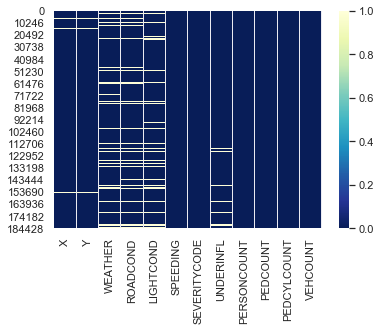

In [30]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

#### We now Drop the records having null values in order to clean the Data.

In [31]:
data_clean.dropna(axis=0, inplace=True)

#### Visualizing the DataSet after dropping the null values shows that there are no more Blanks.

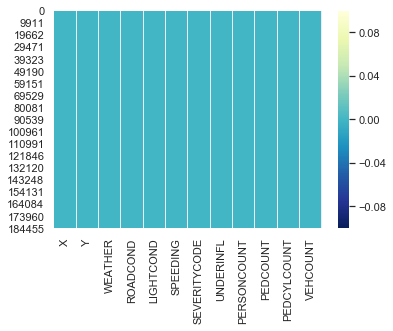

In [32]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

#### As the UNDERINFL field had data inconsistency, it is cleaned by converting all N and 0 values to 0 and all Y and 1 values to 1.

In [33]:
data_clean['UNDERINFL'] = data_clean['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})

In [34]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166217 entries, 0 to 194672
Data columns (total 12 columns):
X               166217 non-null float64
Y               166217 non-null float64
WEATHER         166217 non-null object
ROADCOND        166217 non-null object
LIGHTCOND       166217 non-null object
SPEEDING        166217 non-null float64
SEVERITYCODE    166217 non-null int64
UNDERINFL       166217 non-null int64
PERSONCOUNT     166217 non-null int64
PEDCOUNT        166217 non-null int64
PEDCYLCOUNT     166217 non-null int64
VEHCOUNT        166217 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 16.5+ MB


#### Before encoding the values of the categorical fields, we take a look at their Distribution.

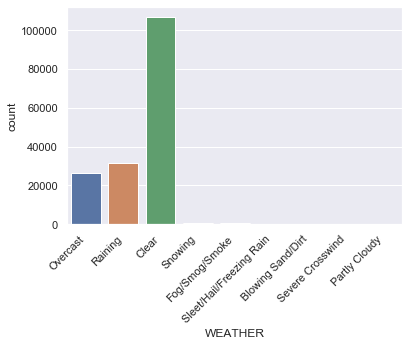

In [35]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

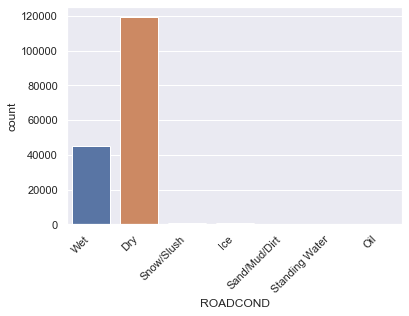

In [36]:
ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()


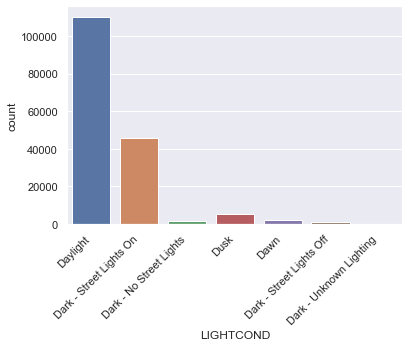

In [37]:
ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

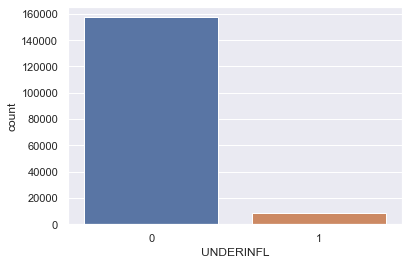

In [38]:
sns.countplot(data_clean['UNDERINFL'])

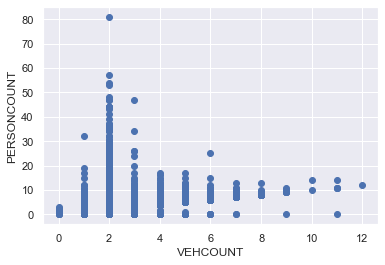

In [39]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

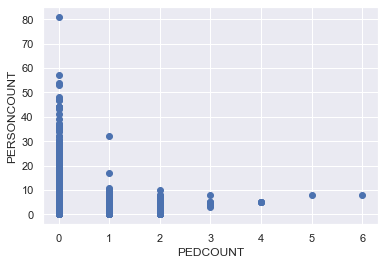

In [41]:
ax = plt.scatter(data_clean['PEDCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('PEDCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

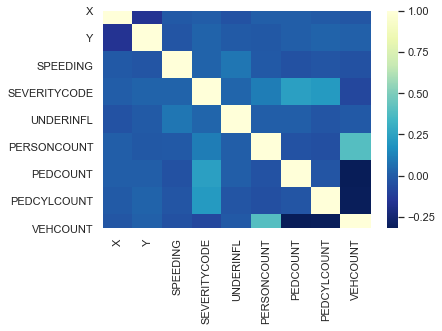

In [42]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

#### We now do an one-hot encoding of the WEATHER, ROADCOND, and LIGHTCOND fields as they are Categorical

In [43]:
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(data_clean['ROADCOND']),
           pd.get_dummies(data_clean['LIGHTCOND']),
           pd.get_dummies(data_clean['WEATHER'])], axis=1)

#### Shuffling of the dataset is necessary as it is an unbalanced DataSet.

In [44]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [45]:
data_clean.head(5).T

,0,1,2,3,4
X,-122.366189,-122.340452,-122.354219,-122.278256,-122.308155
Y,47.664381,47.610964,47.567838,47.564089,47.694859
SPEEDING,0.000000,0.000000,0.000000,0.000000,0.000000
SEVERITYCODE,2.000000,1.000000,2.000000,2.000000,1.000000
UNDERINFL,0.000000,0.000000,0.000000,0.000000,0.000000
PERSONCOUNT,2.000000,3.000000,3.000000,3.000000,1.000000
PEDCOUNT,0.000000,0.000000,0.000000,0.000000,0.000000
PEDCYLCOUNT,1.000000,0.000000,1.000000,0.000000,0.000000
VEHCOUNT,1.000000,2.000000,1.000000,2.000000,1.000000
Dry,1.000000,1.000000,1.000000,1.000000,1.000000


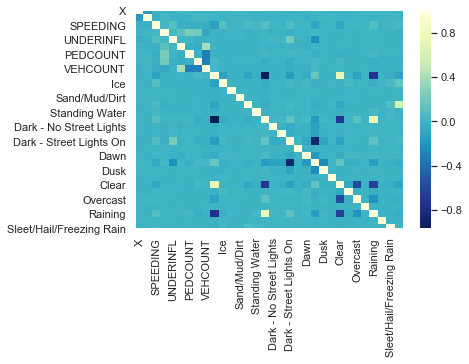

In [46]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

#### After normalization, they are split into x_train, y_train, x_test, and y_test. The first two sets sahll be used for training and the last two shall be used for testing. Upon choosing a suitable split ratio, 80% of data is used for training and 20% of is used for testing.

In [47]:
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
data_clean_scaled[0:3]

array([[-1.20254023,  0.8018037 , -0.23209324, -0.23564163, -0.36264953,
        -0.19793337,  5.46611254, -1.68952678,  0.62835028, -0.07992289,
        -0.01717214, -0.01835817, -0.07045456, -0.02378751, -0.60905854,
        -0.08991369, -0.08053056, -0.61505783, -0.00693774, -0.11941706,
         0.71186295, -0.18554678, -0.01589797,  0.74635028, -0.05693143,
        -0.43432673, -0.00548471, -0.48411165, -0.01201709, -0.02526119,
        -0.07010876],
       [-0.33925133, -0.14078698, -0.23209324, -0.23564163,  0.34634267,
        -0.19793337, -0.17999808,  0.04587593,  0.62835028, -0.07992289,
        -0.01717214, -0.01835817, -0.07045456, -0.02378751, -0.60905854,
        -0.08991369, -0.08053056,  1.62586339, -0.00693774, -0.11941706,
        -1.40476479, -0.18554678, -0.01589797,  0.74635028, -0.05693143,
        -0.43432673, -0.00548471, -0.48411165, -0.01201709, -0.02526119,
        -0.07010876],
       [-0.80102697, -0.9017783 , -0.23209324, -0.23564163,  0.34634267,
       

In [48]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, 
                                                    test_size=0.2, random_state=42)

#### Modelling and Evaluation.

In [52]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dTreeModel.fit(x_train, y_train)
dTreeModel

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
yHat = dTreeModel.predict(x_test)

In [54]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.73      0.96      0.83     22276
           2       0.75      0.27      0.39     10968

    accuracy                           0.73     33244
   macro avg       0.74      0.61      0.61     33244
weighted avg       0.73      0.73      0.68     33244



In [55]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.01)
logRegModel.fit(x_train, y_train)
logRegModel

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
yHat = logRegModel.predict(x_test)

In [57]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.72      0.97      0.83     22276
           2       0.82      0.23      0.36     10968

    accuracy                           0.73     33244
   macro avg       0.77      0.60      0.59     33244
weighted avg       0.75      0.73      0.67     33244



In [72]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [73]:
yHat = rfcModel.predict(x_test)

In [74]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       0.74      0.81      0.77     22276
           2       0.52      0.41      0.46     10968

    accuracy                           0.68     33244
   macro avg       0.63      0.61      0.62     33244
weighted avg       0.67      0.68      0.67     33244



#### Results

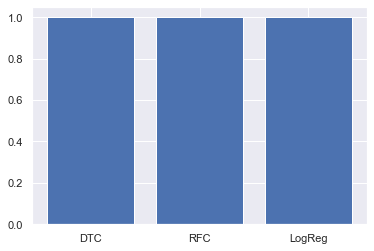

In [75]:
plt.bar(['DTC', 'RFC', 'LogReg'], [1.,1.,1.])
plt.show()

#### Conclusion

Initially, the classifiers had an prediction accuracy of 66%-71%, however, upon going back to the data preparation phase, minor tweaking and taking additional fields in the dataset improved the overall accuracy of all models.

The accuracy of the classifiers is excellent, i.e. 100%. This means that the model has trained well and fits the training data and performs well on the testing set as well as the training set. We can conclude that this model can accurately predict the severity of car accidents in Seattle.

#### Future Work

The trained model can be Deployed onto Governance and Monitoring Web and Mobile Applications to predict the Accident Severity for a given set of Parameters.